## 갭마인더 테스트 - 내 나라는 몇 점일까? 

* 세계를 이해하는 방법, 총 13개 문항으로 3가지 중에 하나를 고르는 객관식이다. 
* 14개국 1.2만명을 대상으로 진행
* 아래 주소에서 직접 테스트를 해 보자 : http://forms.gapminder.org/s3/test-2018
* 출처 : 한스 로스링의 '팩트풀니스(Factfulness)'

In [0]:
import pandas as pd
import numpy as np

# 구글 Colab 한글 설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

import seaborn as sns
%matplotlib inline

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

**분석 데이터는 책에서 직접 입력했다.  문항과 국가별 정답자 비율(팩트풀니스 378쪽)**

In [0]:
# [저소득국가에서 여성의 교육수준] 오늘날 세계 모든 저소득 국가에서 초등학교를 나온 여성을 얼마나 될까? 
q1 = pd.Series([11,10,10,9,9,8,7,6,6,6,6,5,4,4], 
               index=['스웨덴', '미국', '한국', '독일', '헝가리', '오스트레일리아', '일본', '영국', '벨기에', '핀란드', '노르웨이', '캐나다', '프랑스', '스페인'])

# [다수의 교육수준] 세계 인구의 다수는 어디에 살까?  
q2 = pd.Series([39, 36, 30, 29, 28, 26, 26, 24, 24, 23, 21, 19, 17, 17], 
               index=['한국', '미국', '오스트레일리아', '프랑스', '스웨덴', '캐나다', '노르웨이', '스페인', '일본', '영국', '벨기에', '핀란드', '독일', '헝가리'])

# [극빈층]  지난 20년간 세계 인구에서 극빈층 비율은 어떻게 바뀌었을까? 
q3 = pd.Series([25, 25, 17, 10, 9, 9, 6, 6, 5, 5, 4, 4, 3, 2], 
               index=['스웨덴', '노르웨이', '핀란드', '일본', '영국', '캐나다', '오스트레일리아', '독일', '미국', '벨기에', '한국', '프랑스', '스페인', '헝가리'])

# [수명] 오늘날 세계 기대 수명은 몇 세일까?   
q4 = pd.Series([49, 43, 43, 43, 41, 41, 40, 38, 37, 30, 29, 29, 28, 25], 
               index=['한국', '독일', '미국', '캐나다', '스페인', '오스트레일리아', '벨기에', '프랑스', '영국', '핀란드', '스웨덴', '헝가리', '일본', '노르웨이'])

# [미래 아동 수] 오늘 날 세계 인구 중 0~15세 다옹은 20억이다. 유엔이 예상하는 2100년의 이 수치는 얼마일까?  
q5 = pd.Series([45, 36, 21, 12, 12, 10, 9, 9, 9, 9, 9, 8, 8, 8], 
               index=['한국', '일본', '스페인', '헝가리', '캐나다', '미국', '프랑스', '벨기에', '독일', '오스트레일리아', '핀란드', '영국', '노르웨이', '스웨덴'])

# [인구 증가층] 유엔은 2100년까지 세계인구가 40억 늘어날 것으로 예상한다. 주로 어떤 인구층이 늘어날까?    
q6 = pd.Series([36, 33, 32, 32, 26, 26, 26, 26, 26, 25, 22, 21, 20, 10], 
               index=['미국', '캐나다', '오스트레일리아', '스웨덴', '프랑스', '독일', '벨기에', '스페인', '노르웨이', '헝가리', '영국', '핀란드', '한국', '일본'])

# [자연재해] 지난 100년간 연간 자연재해 사망자 수는 어떻게 변했을까?   
q7 = pd.Series([16, 16, 15, 15, 14, 12, 11, 9, 8, 8, 6, 4, 3, 3], 
               index=['노르웨이', '핀란드', '스웨덴', '일본', '영국', '오스트레일리아', '미국', '스페인', '한국', '캐나다', '독일', '벨기에', '프랑스', '헝가리'])

# [거주지] 오늘날 세계 인구는 약 70억이다. 아래 지도 중 거주 분포를 가장 잘 나태내는 것은? (정답 : 아시아는 3. 북아메리카,남아메리카,유럽,아프리카는 각각 1에 해당됨 )
q8 = pd.Series([34, 34, 32, 32, 30, 30, 27, 26, 26, 25, 24, 24, 23, 21], 
               index=['캐나다', '오스트레일리아', '헝가리', '노르웨이', '미국', '핀란드', '영국', '프랑스', '한국', '독일', '스웨덴', '일본', '스페인', '벨기에'])

# [아동 예방접종] 오늘날 전 세계 1세대 아동 중 어떤 질병이든 예방접종을 받은 비율은 몇 퍼센트일까?   
q9 = pd.Series([21, 18, 17, 16, 15, 15, 14, 13, 13, 13, 12, 6, 6, 6], 
               index=['스웨덴', '노르웨이', '미국', '한국', '캐나다', '영국', '오스트레일리아', '스페인', '헝가리', '벨기에', '핀란드', '일본', '독일', '프랑스'])

# [여성의 교육 수준] 전 세계 30세 남성은 평균 10년간 학교를 다닌다. 같은 나이의 여성은 평균 몇 년간 학교를 다닐까?   
q10 = pd.Series([32, 32, 26, 25, 25, 21, 20, 19, 18, 18, 13, 13, 10, 8], 
               index=['헝가리', '한국', '미국', '독일', '오스트레일리아', '일본', '캐나다', '영국', '프랑스', '스웨덴', '벨기에', '스페인', '핀란드', '노르웨이'])

# [멸종위기 동물] 1996년 호랑이, 대왕판다, 검은코뿔소가 모두 멸종위기종으로 등록되었다. 이 셋 중 몇 종이 오늘날 더 위급한 단계의 멸종 위기종이 되었을까?   
q11 = pd.Series([26, 12, 12, 12, 11, 8, 7, 7, 7, 6, 5, 5, 5, 3], 
               index=['일본', '미국', '캐나다', '오스트레일리아', '핀란드', '한국', '스페인', '독일', '벨기에', '스웨덴', '영국', '프랑스', '노르웨이', '헝가리'])

# [전기 공급] 세계 인구 중 어떤 식으로든 전기를 공급받는 비율은 몇 퍼센트일까?
q12 = pd.Series([32, 31, 27, 23, 22, 22, 22, 20, 20, 19, 19, 17, 15, 14], 
               index=['노르웨이', '스웨덴', '미국', '영국', '헝가리', '독일', '한국', '프랑스', '핀란드', '캐나다', '오스트레일리아', '벨기에', '일본', '스페인'])

# [기후] 세계 기후 전문가들은 앞으로 100년 동안의 평균 기온 변화를 어떻게 예상할까? 
q13 = pd.Series([94, 94, 94, 92, 89, 88, 88, 87, 87, 82, 81, 81, 78, 76], 
               index=['헝가리', '노르웨이', '핀란드', '스페인', '프랑스', '한국', '독일', '벨기에', '영국', '스웨덴', '미국', '캐나다', '오스트레일리아', '일본'])

In [0]:
question_description = {'q1':'저소득국가여성교육수준',
                        'q2':'다수의소득수준',
                        'q3':'극빈층',
                        'q4':'수명',
                        'q5':'미래아동수',
                        'q6':'인구증가층',
                        'q7':'자연재해',
                        'q8':'거주지',
                        'q9':'아동예방접종',
                        'q10':'여성의교육수준',
                        'q11':'멸종위기동물',
                        'q12':'전기공급',
                        'q13':'기후',}

**테이터는 이렇게 생겼다**

In [35]:
df = pd.concat([q1, q2, q3, q4, q5, q6, q7, q8, q9, q10, q11, q12, q13], axis=1, sort=True)
df.columns = question_description.keys()
df

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13
노르웨이,6,26,25,25,8,26,16,32,18,8,5,32,94
독일,9,17,6,43,9,26,6,25,6,25,7,22,88
미국,10,36,5,43,10,36,11,30,17,26,12,27,81
벨기에,6,21,5,40,9,26,4,21,13,13,7,17,87
스웨덴,11,28,25,29,8,32,15,24,21,18,6,31,82
스페인,4,24,3,41,21,26,9,23,13,13,7,14,92
영국,6,23,9,37,8,22,14,27,15,19,5,23,87
오스트레일리아,8,30,6,41,9,32,12,34,14,25,12,19,78
일본,7,24,10,28,36,10,15,24,6,21,26,15,76
캐나다,5,26,9,43,12,33,8,34,15,20,12,19,81


**문항별 요약통계량**

In [32]:
df.describe()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,7.214286,25.642857,9.285714,36.857143,14.642857,25.785714,10.000000,27.714286,13.214286,20.000000,9.000000,21.642857,86.500000
std,2.293086,6.499789,7.650325,7.315496,11.586512,6.530150,4.819831,4.250404,4.560340,7.473028,5.724442,5.329268,6.035153
min,4.000000,17.000000,2.000000,25.000000,8.000000,10.000000,3.000000,21.000000,6.000000,8.000000,3.000000,14.000000,76.000000
25%,6.000000,21.500000,4.250000,29.250000,9.000000,22.750000,6.500000,24.250000,12.250000,14.250000,5.250000,19.000000,81.250000
50%,6.500000,25.000000,6.000000,39.000000,9.000000,26.000000,10.000000,26.500000,13.500000,19.500000,7.000000,21.000000,87.500000
75%,9.000000,28.750000,9.750000,42.500000,12.000000,30.500000,14.750000,31.500000,15.750000,25.000000,11.750000,22.750000,91.250000
max,11.000000,39.000000,25.000000,49.000000,45.000000,36.000000,16.000000,34.000000,21.000000,32.000000,26.000000,32.000000,94.000000


**문항별 정답자비율 평균**

,question,description,means
12,q13,기후,86.500000
3,q4,수명,36.857143
7,q8,거주지,27.714286
5,q6,인구증가층,25.785714
1,q2,다수의소득수준,25.642857
11,q12,전기공급,21.642857
9,q10,여성의교육수준,20.000000
4,q5,미래아동수,14.642857
8,q9,아동예방접종,13.214286
6,q7,자연재해,10.000000


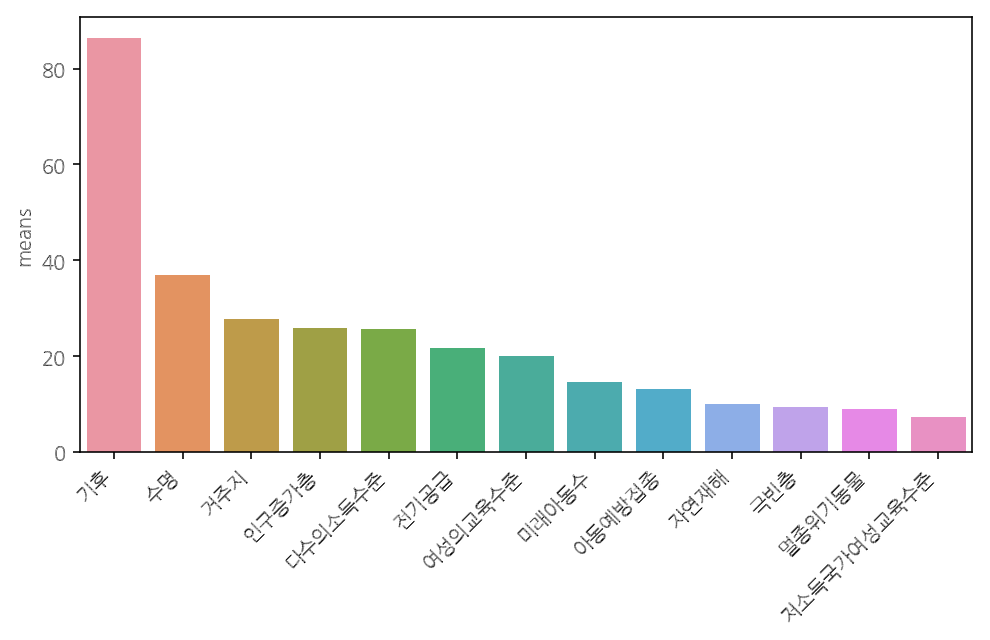

In [85]:
cols = pd.Series(df.columns)
desc = pd.Series(list(question_description.values()))
means = pd.Series(df.mean().values)
results = pd.concat([cols, desc, means ], axis=1, sort=True)
results.columns = ['question', 'description', 'means']
results.sort_values(by='means',ascending=False, inplace=True)

plt.figure(figsize=(8, 4))
sns.barplot(x='description', y='means', data=results)
plt.xticks(rotation = 45, ha="right")
plt.xlabel('')

results

기후변화의 심각성에 대해서는 압도적으로 정답율이 높다.  
하지만, 나머지 문항은 정답율이 40%에도 못미친다.   
객관식 3개 문항이기 때문에 침팬지가 찍어도 33%는 정답율이 나오기 마련인데, 침팬지에도 못미치는 문항이 상당히 많다. 

---

**국가별 정답자 비율을 살펴보자**

,nation,means
12,한국,28.230769
2,미국,26.461538
4,스웨덴,25.384615
0,노르웨이,24.692308
7,오스트레일리아,24.615385
9,캐나다,24.384615
8,일본,22.923077
6,영국,22.692308
11,핀란드,22.692308
13,헝가리,22.538462


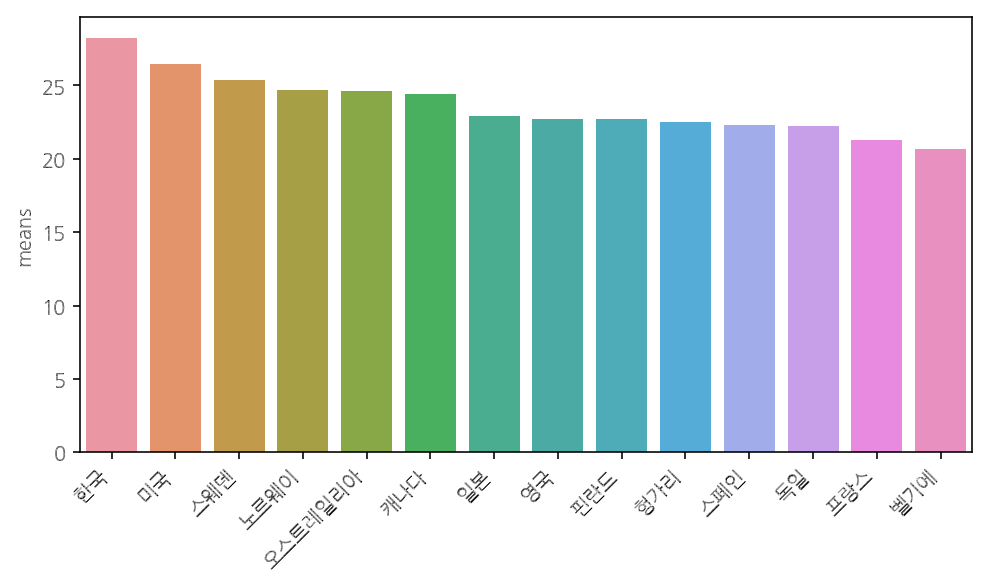

In [90]:
cols = pd.Series(df.index)
means = pd.Series(df.mean(axis=1).values)
results = pd.concat([cols, means ], axis=1, sort=True)
results.columns = ['nation', 'means']
results.sort_values(by='means', ascending=False, inplace=True)

plt.figure(figsize=(8, 4))
sns.barplot(x='nation', y='means', data=results)
plt.xticks(rotation = 45, ha="right")
plt.xlabel('')

results

웬일.. 한국이 1등이다. ㅎ  
벨기에, 프랑스, 독일이 정답자 비율이 낮은게 의외다.   
세계에 대한 이해가 낮은 것인지? 

--- 
**문항과 국가별 정답자비율 차트이다.**  
팩트풀니스에 삽입된 차트를 최대한 똑같이 재현하였다. 

In [0]:
def barchart(ser, title):
  ser = ser.sort_values(ascending=False)
  
  sns.set_style("whitegrid")
  
  plt.rc('font', family=font_name)
  f, ax = plt.subplots(figsize=(8, 4))
  sns.barplot(x=ser.values, y=ser.index)
  ax.set(xlim=(0, 100), xlabel='')
  plt.axvline(33, color='blue', linestyle='--', linewidth=1)
  plt.title(title)
  plt.show()

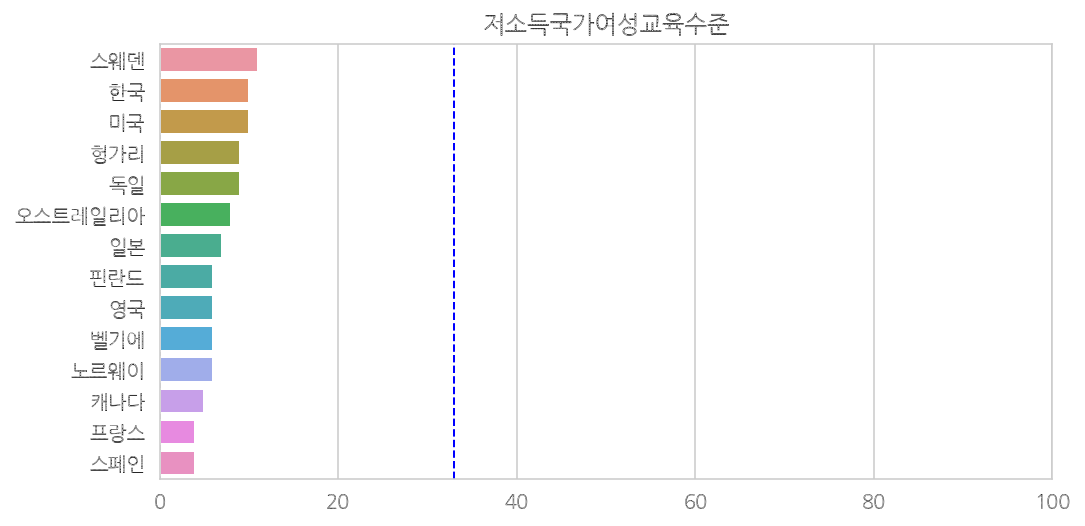

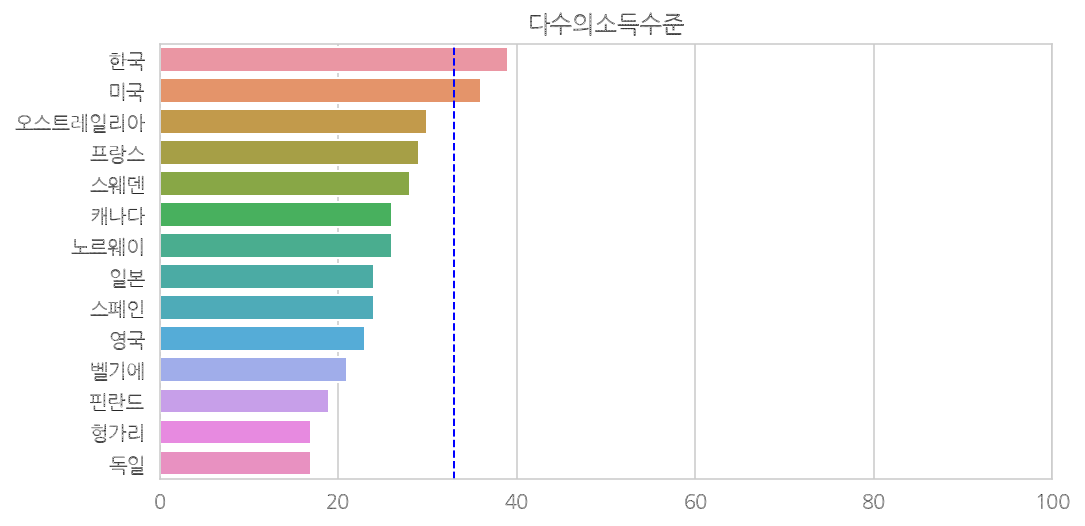

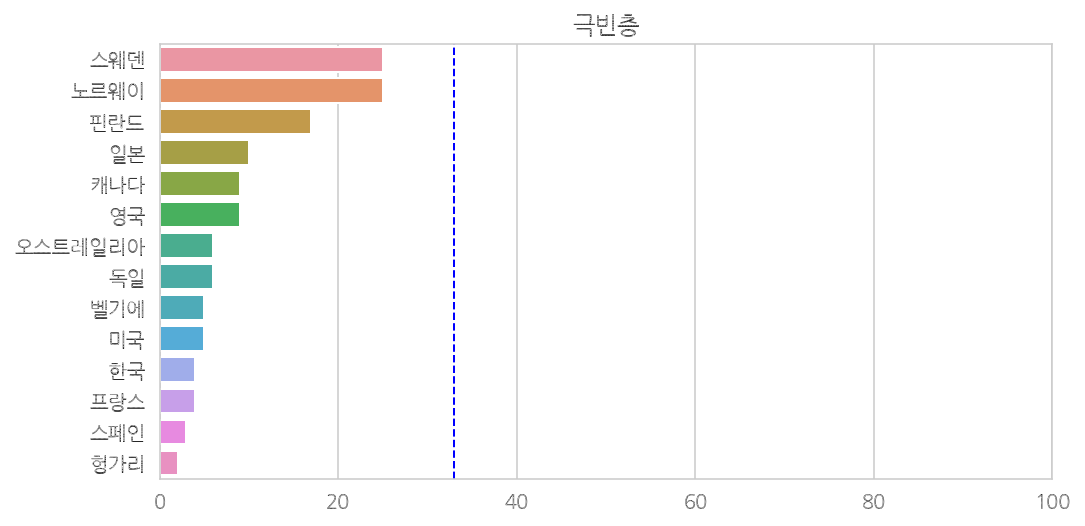

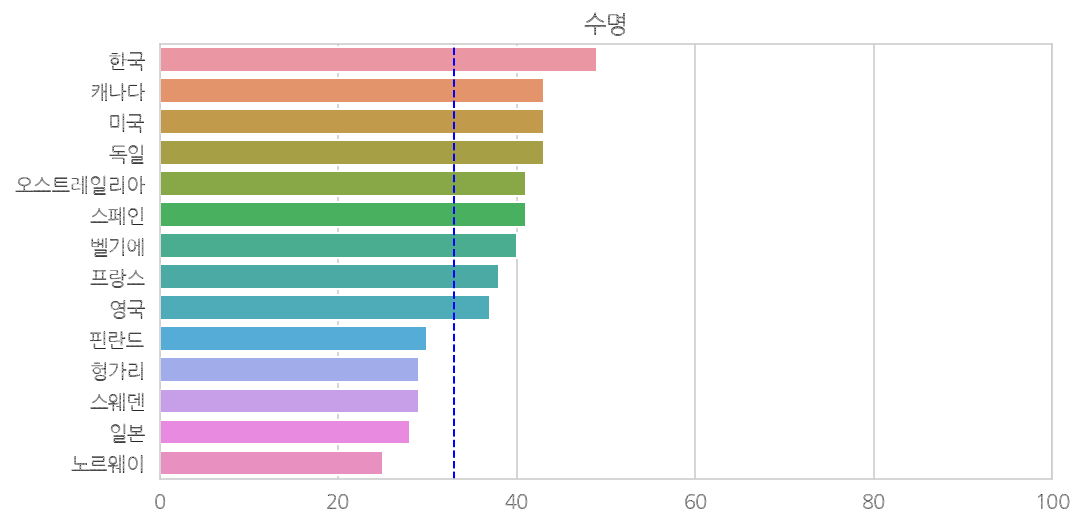

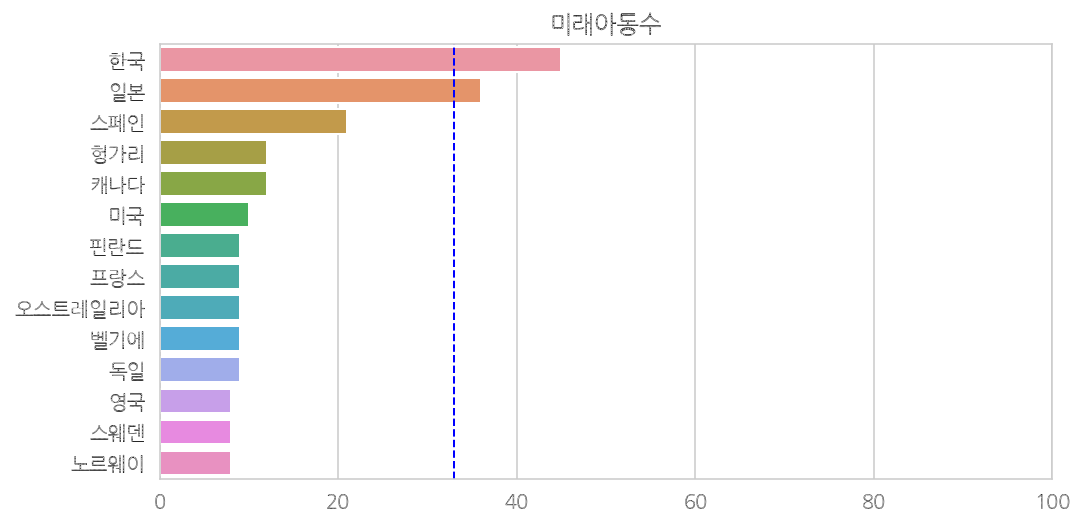

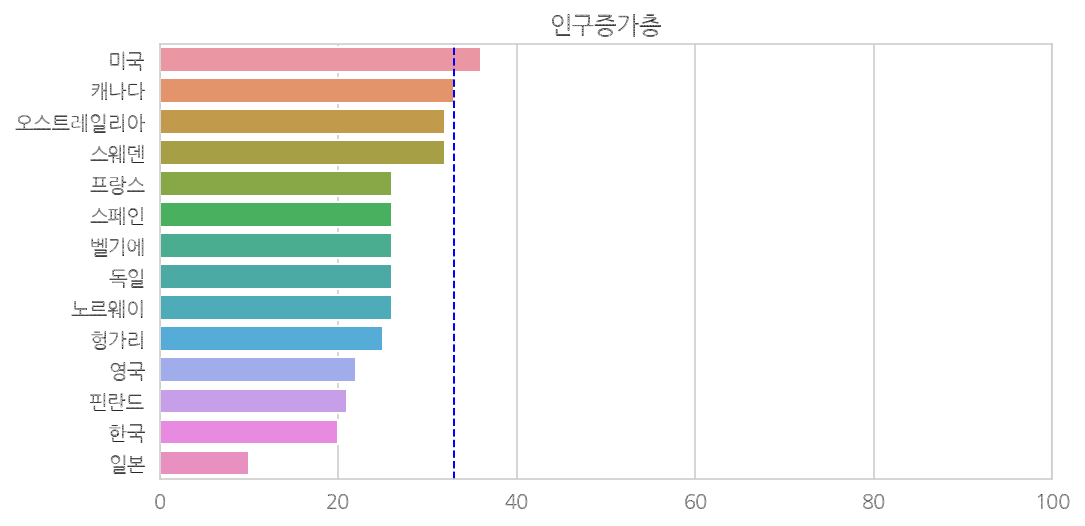

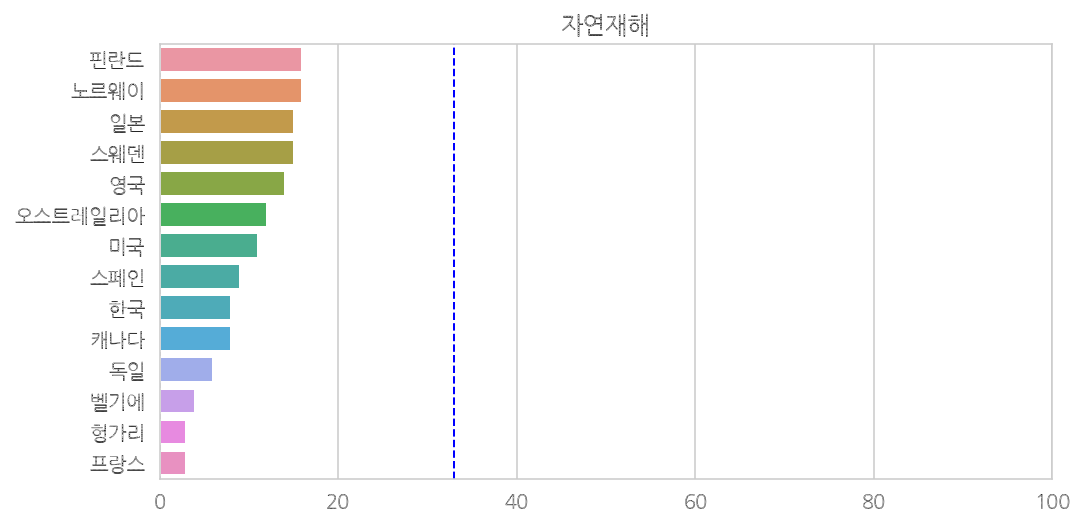

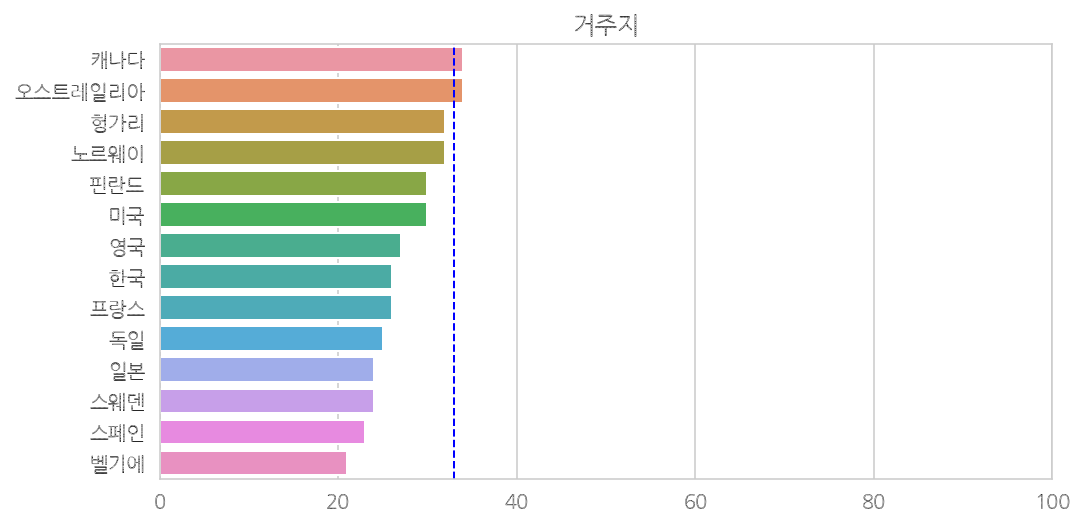

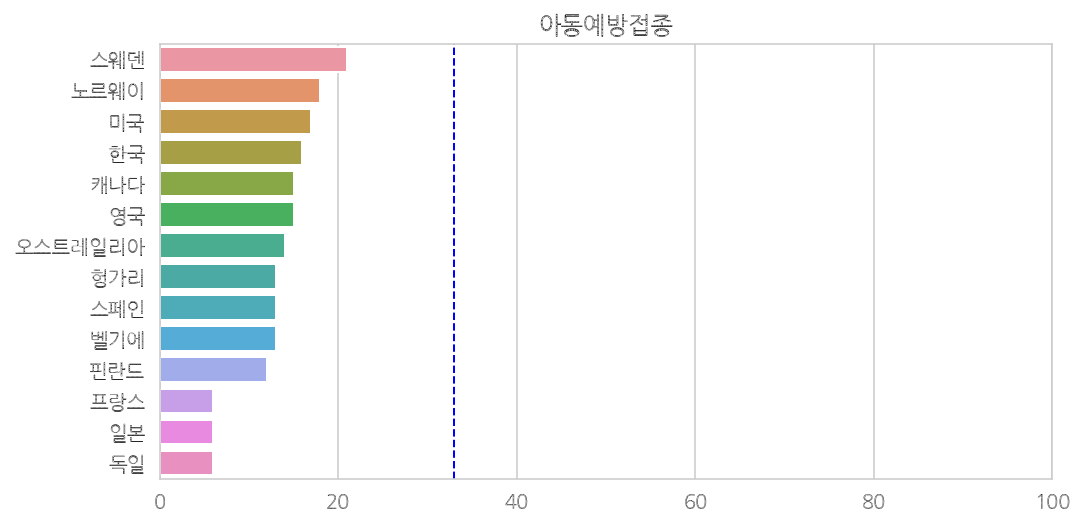

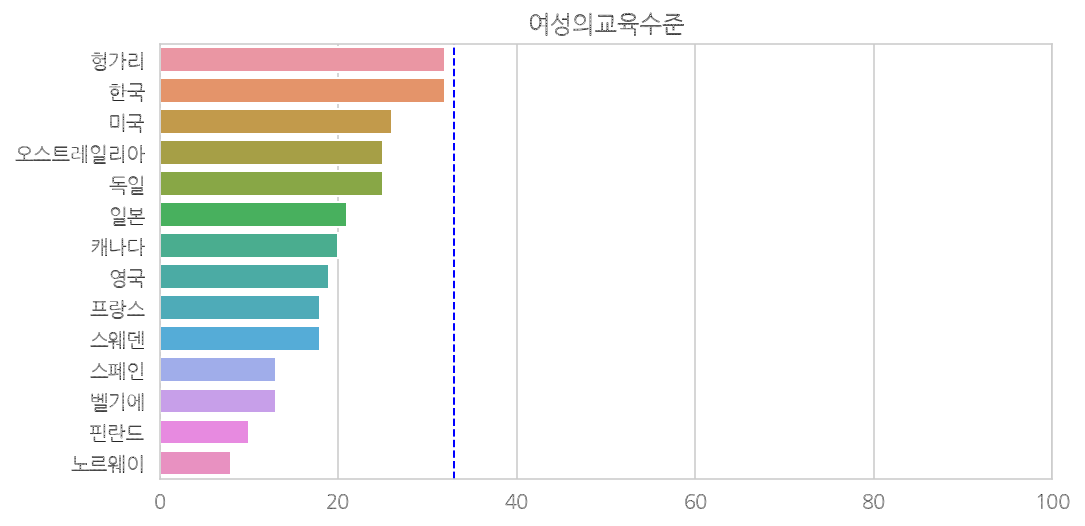

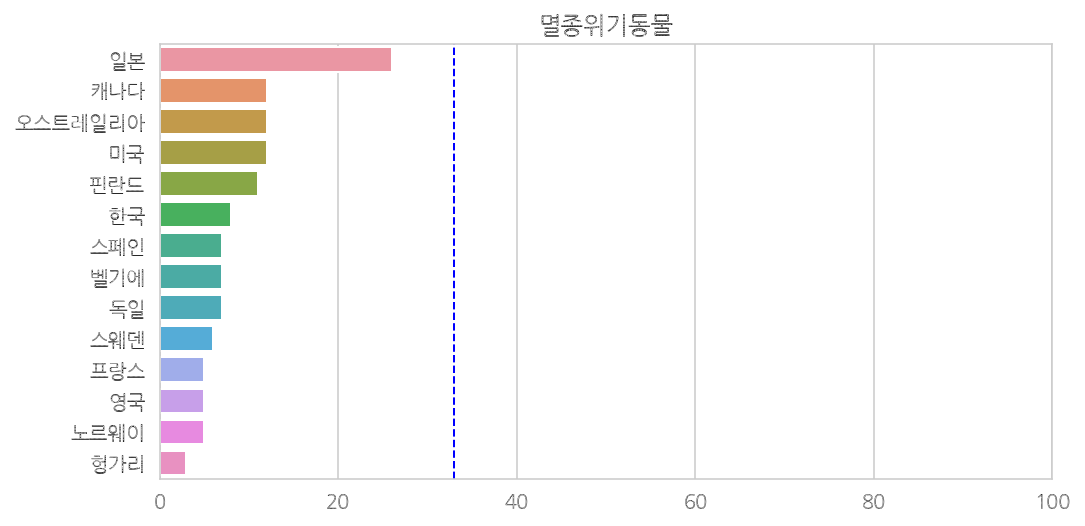

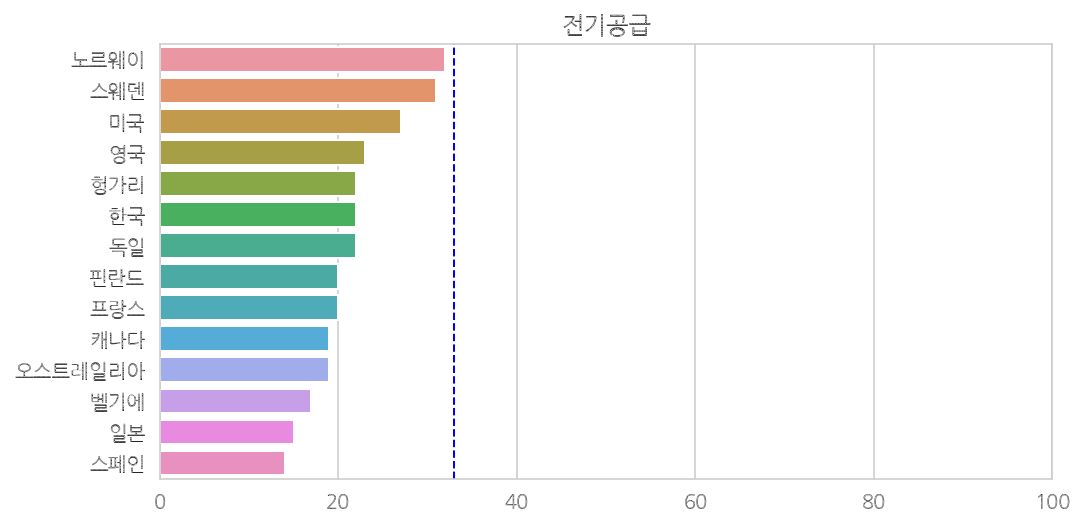

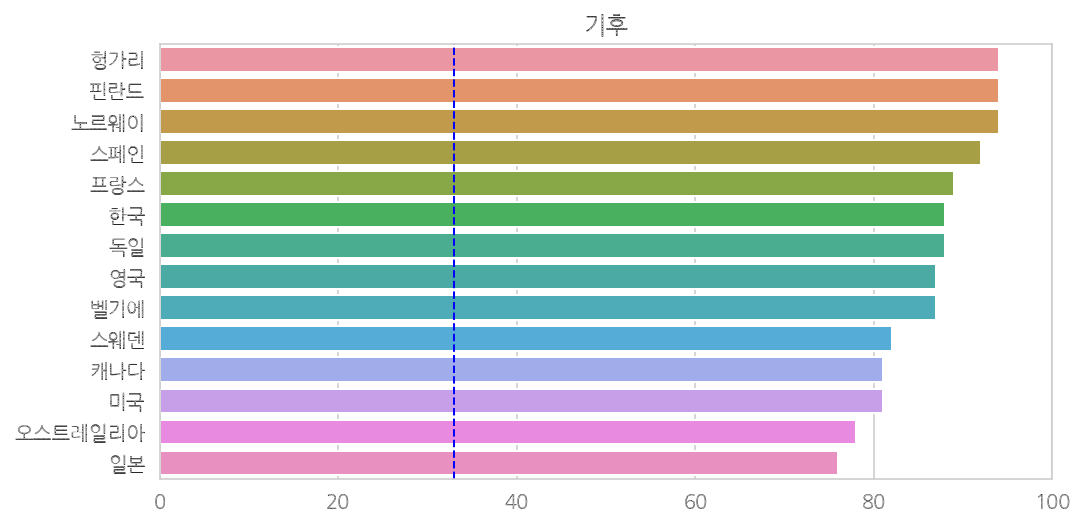

In [134]:
for iter in question_description.items():
  barchart(df[iter[0]], iter[1])

책에 재치있게 표현된대로, 문항별로 정답자비율 33%에는 침팬지 세로 줄을 그렸다.  

---
**국가별로 정답자 비율 분포를 비교해보자.**  
13개 문항의 데이터로 박스플롯을 활용했다. 

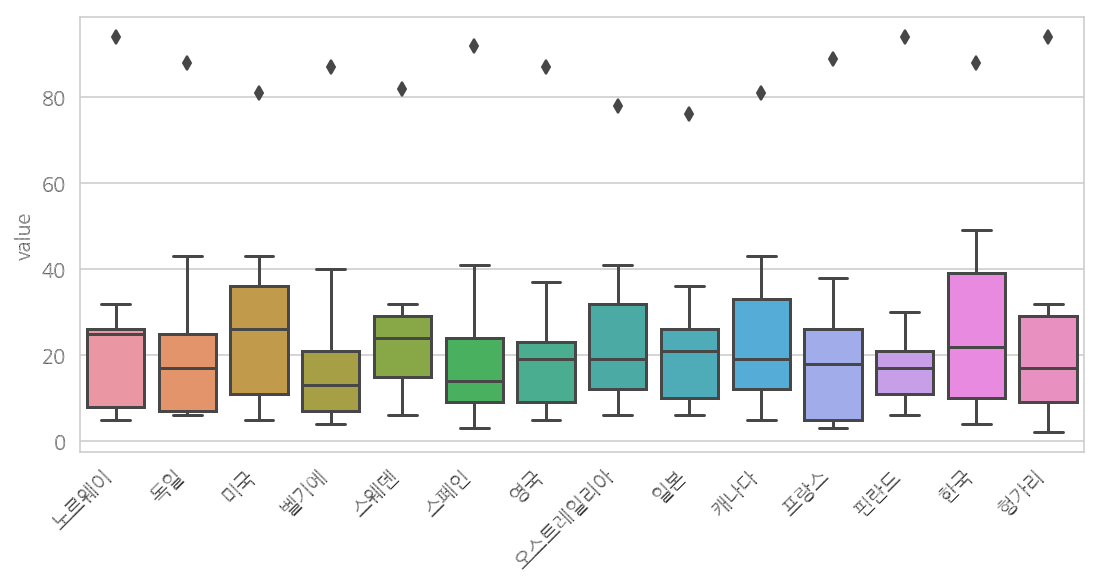

In [149]:
results = df.T.melt()

plt.figure(figsize=(9, 4))
sns.boxplot(x='variable', y='value', data=results)
plt.xticks(rotation = 45, ha="right")
plt.xlabel('')
plt.show();

우리나라는 문항 전체에서 정답자 비율 평균이 가장 높았지만, 분포가 두터워 질문간의 편차가 다른 나라보다 큼을 알 수 있다.  
반면 핀란드는 상대적으로 문항별 정답자 비율이 고르게 나왔다.  

---
**마지막으로 국가간 점수로 유사도를 계산해보자.**   
seaborn의 클러스터맵 차트를 활용한다. 

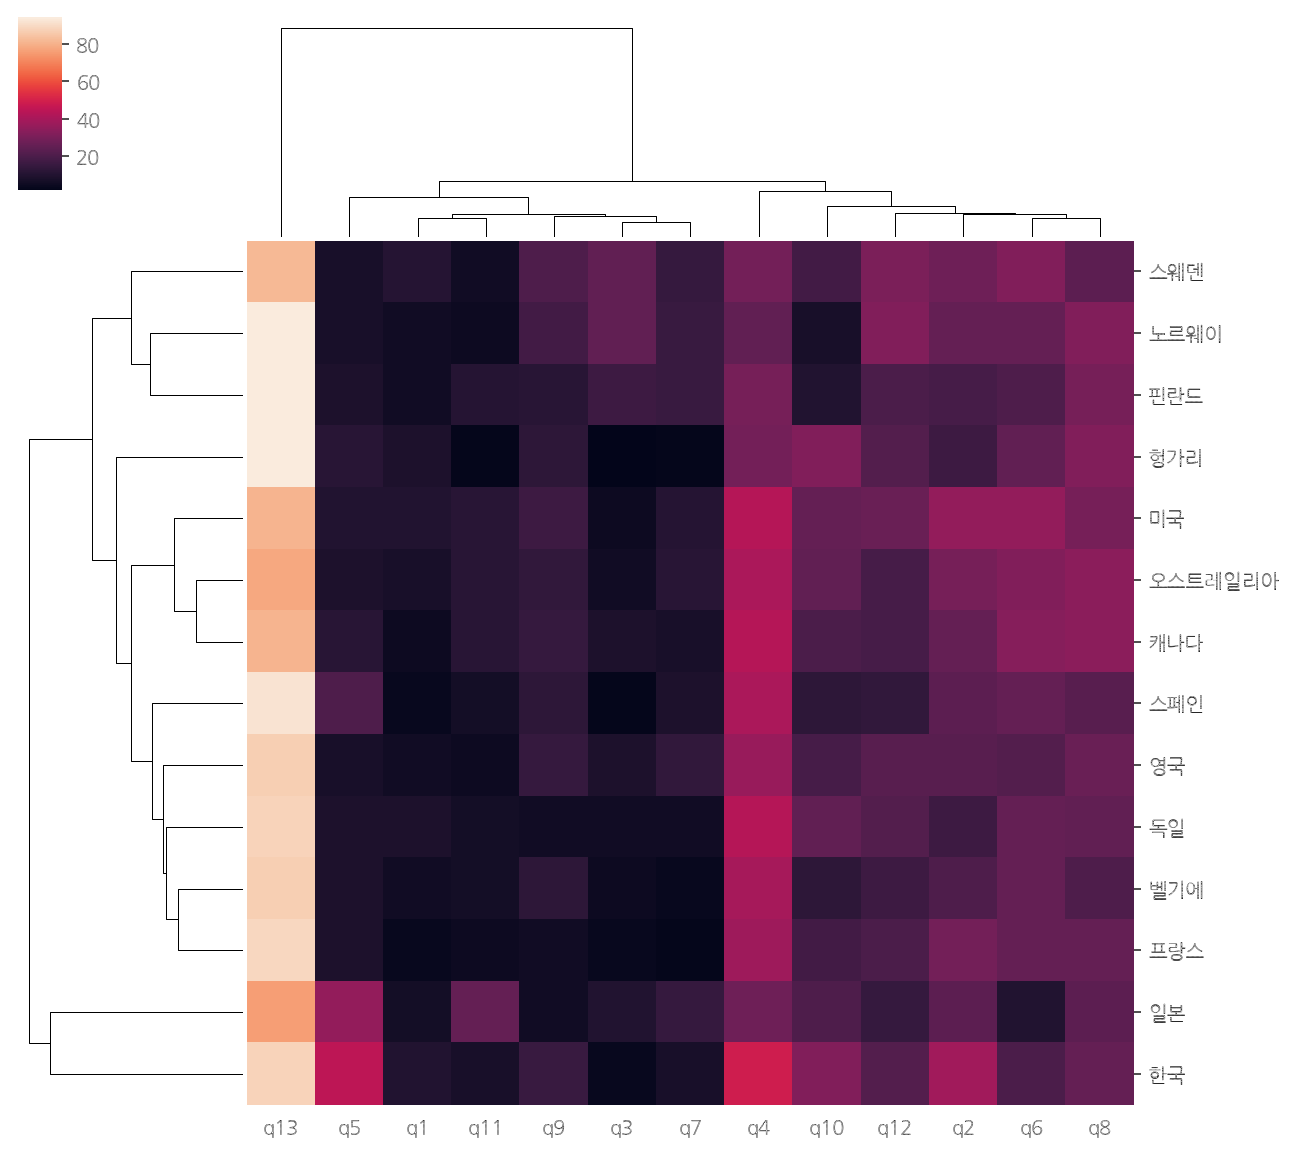

In [148]:
g = sns.clustermap(df)

세로 축의 국가만 살펴보자.  가까이 있을수록 문항별로 점수가 유사하다고 보면 된다.  
지역별로 유사하게 묶인 점이 특이하다. 아래를 참조하자 
* 우리나라와 일본
* 독일과 벨기에, 영국스웨덴
* 노르웨이, 스웨덴, 핀란드  
* 미국, 캐나다와 오스트레일리아 

---
분석을 마치며 ... 
* 데이터로 겸손하고 정직하게 세상을 바라보자.    
* 한스 로슬링의 팩트풀니스 강추(유작이라 무척 아쉽다)